In [1]:
import pandas as pd
import os
import numpy as np
import math
from matplotlib import pyplot as plt
from rdkit import Chem
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from utils import *
from plotting import *

In [2]:
matchms_scores = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.0035_1%I_all_peaks_with_0s_only_matching.tsv", sep="\t")
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_scores': 'scores'}, inplace=True)
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_matches': 'matches'}, inplace=True)

matchms_scores = append_classes(matchms_scores, 'query')
df = normalize_df(append_spectrum_metadata(matchms_scores), matches_norm_col=None)
del df['peak_comments']

matches_col = 'matches'
scores_col = 'scores'

df['matches_norm_query'] = df[matches_col] / df['n_peaks_query']
df['matches_norm_reference'] = df[matches_col] / df['n_peaks_reference']

In [3]:
import scipy.stats as stats

stats.pearsonr(df['molecular_flexibility'].astype(float), df[scores_col].astype(float))

PearsonRResult(statistic=-0.49803085122146573, pvalue=3.767904039236487e-25)

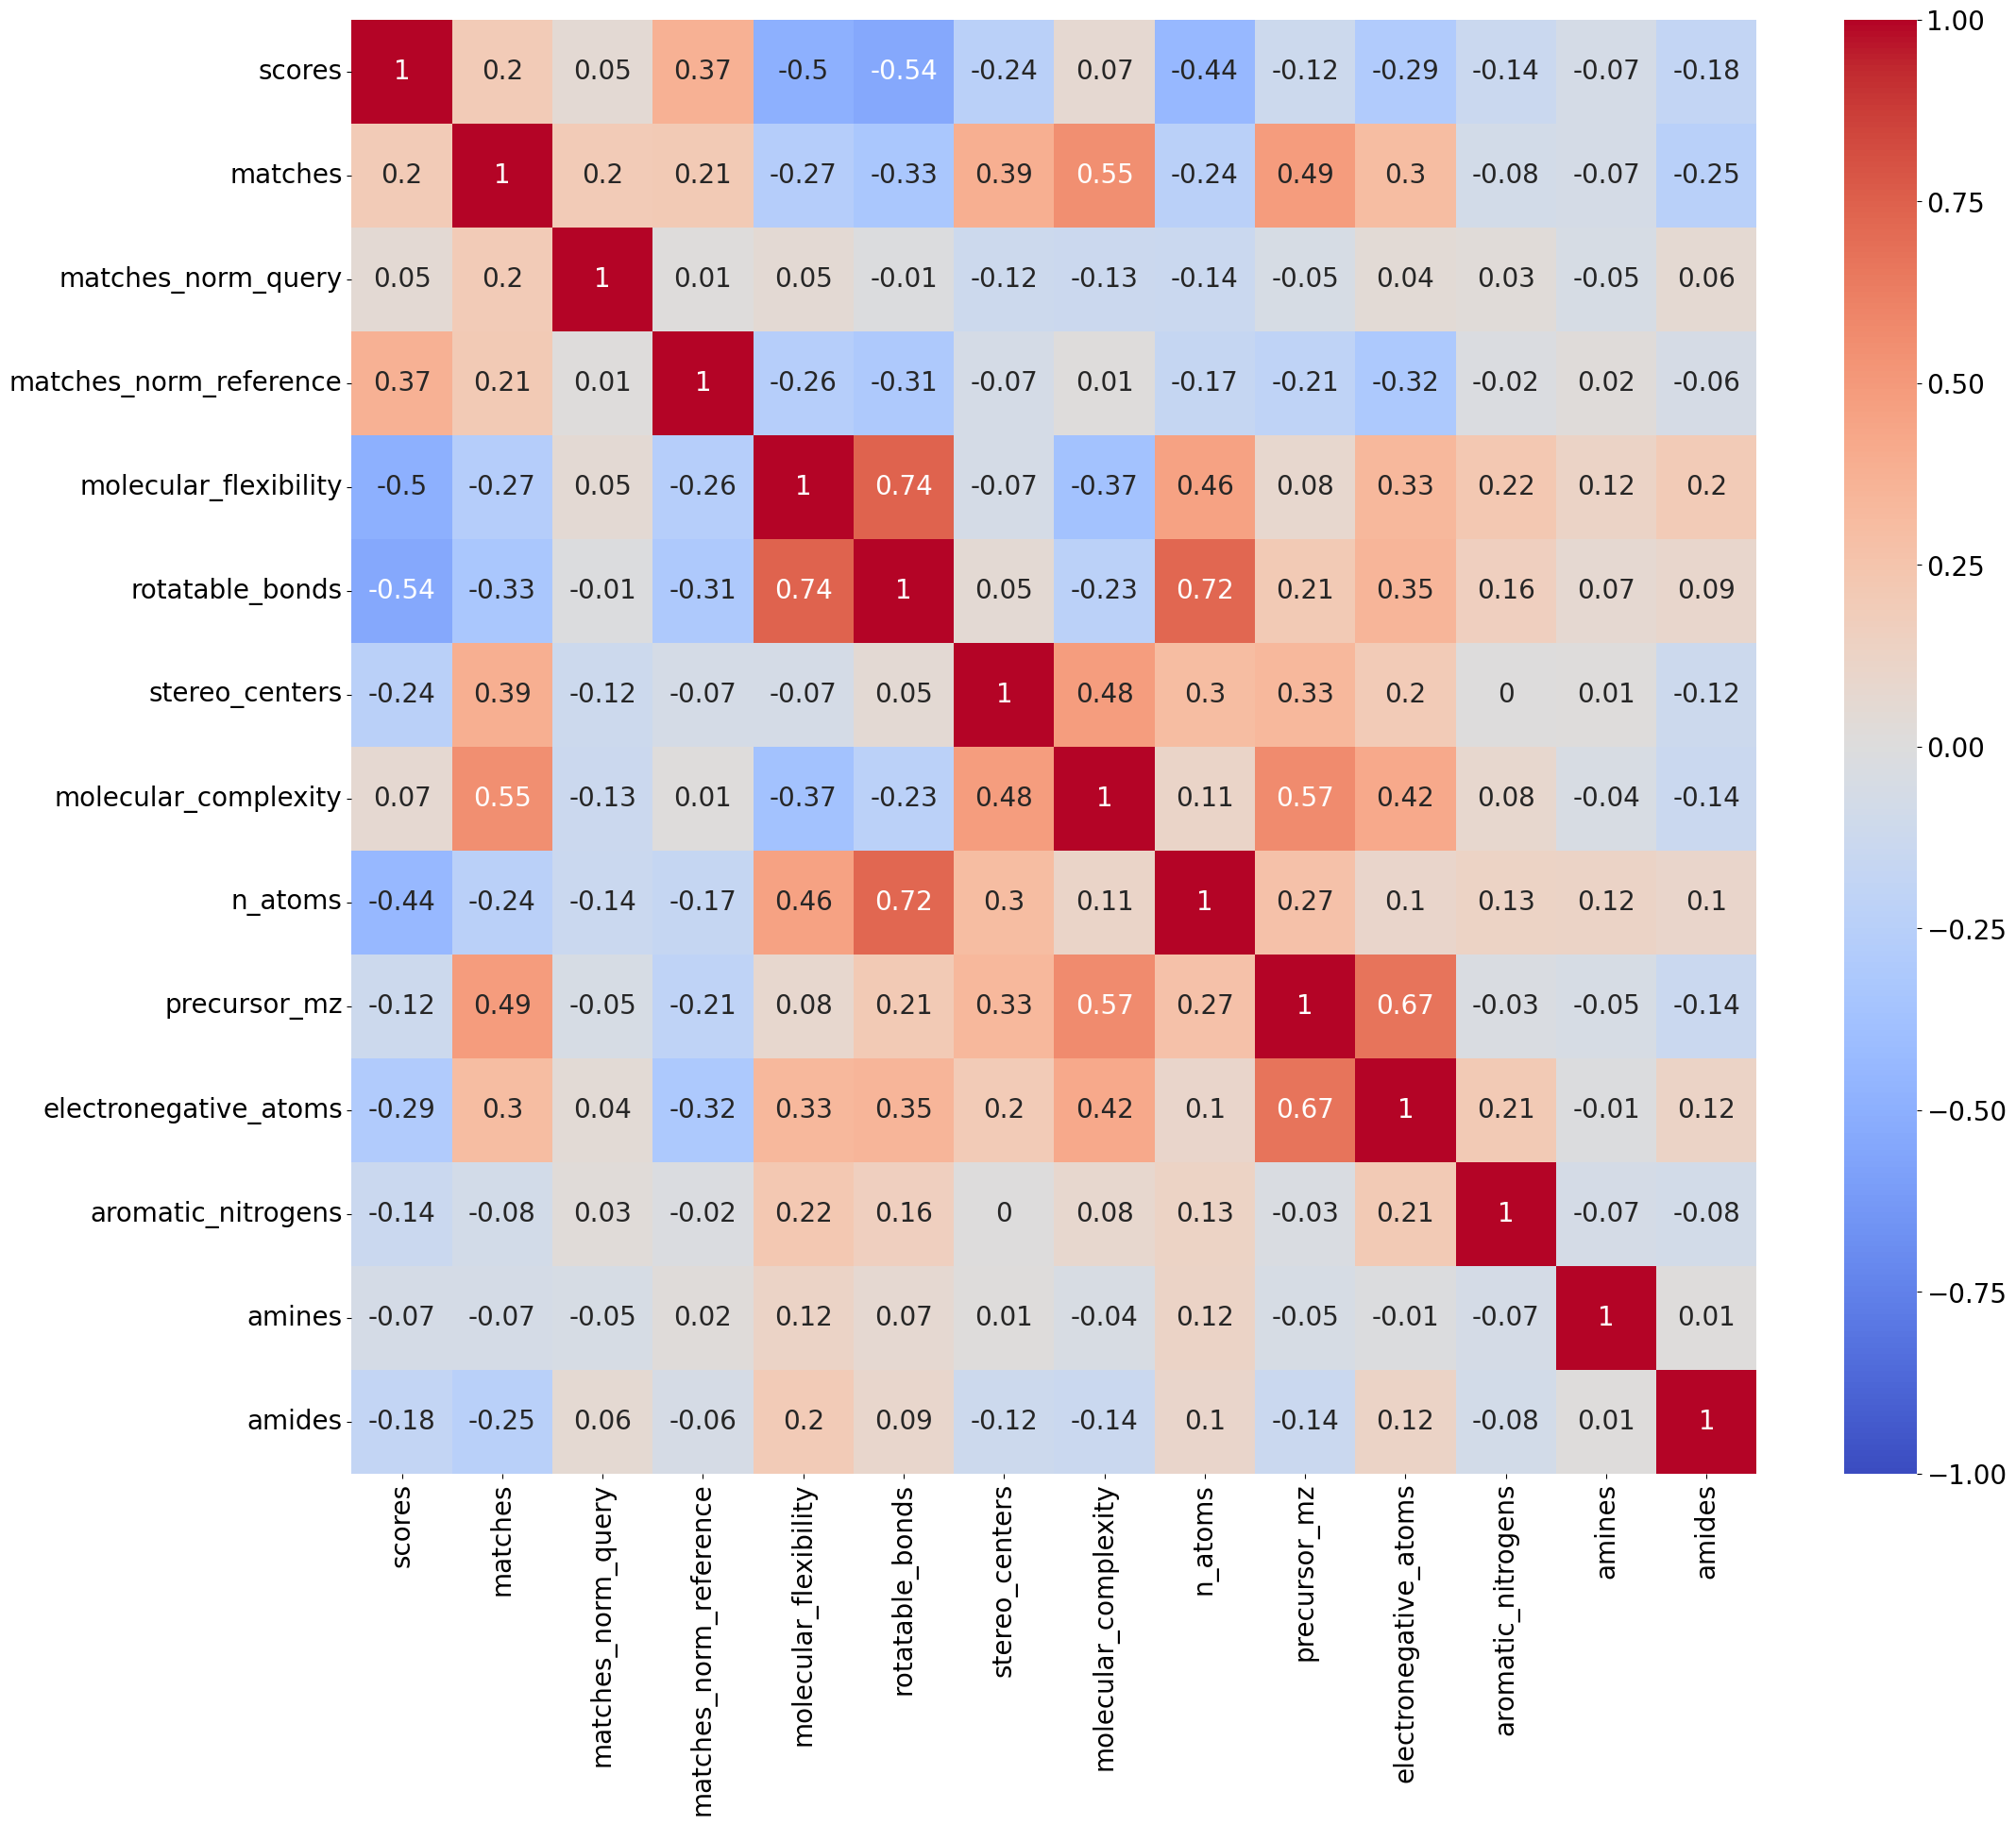

In [4]:
properties = [
    'scores',
    'matches',
    'matches_norm_query',
    'matches_norm_reference',
    'molecular_flexibility',
    'rotatable_bonds',
    'stereo_centers',
    'molecular_complexity',
    'n_atoms',
    'precursor_mz',
    'electronegative_atoms',
    'aromatic_nitrogens',
    'amines',
    'amides',
]

# Assuming `df` is your DataFrame
corr = df[properties].corr().round(2)

plt.figure(figsize=(24, 20))
cax = sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1,annot_kws={"size": 20})
# plt.title('Pearson Correlations')
plt.tick_params(axis='both', which='major', labelsize=20)
# Get the colorbar from the HeatMap and set the fontsize for its tick labels
cbar = cax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.show()
# plot name in the manuscript:
# "correlations/20240517_heatmap_properties_correlations.png"